<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group4_70_30_layer_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset

In [ ]:
## Setup
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

!pip install zipfile
from zipfile import ZipFile
! gdown --id 1JLxmrftssqDKPeyFFs_iMIy_Dio1727C

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLxmrftssqDKPeyFFs_iMIy_Dio1727C
To: /content/DatasetG4.zip
100% 22.5M/22.5M [00:00<00:00, 37.4MB/s]


Unzip Dataset

In [ ]:
with ZipFile('/content/DatasetG4.zip','r') as zipObj:
  zipObj.extractall()

Load Data

In [ ]:
batch_size = 50 # Of course here, we are using mini-batch gradient descent
img_height = 224
img_width = 224

Data split to 70 training data and 30 test data

In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG4'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

['Side View', 'Front View']
/content/DatasetG4/Side View/20210612_191604.jpg
/content/output/train/Side View/20210612_191604.jpg
/content/DatasetG4/Side View/2 day 7.jpg
/content/output/train/Side View/2 day 7.jpg
/content/DatasetG4/Side View/Copy of 1623490300899.jpg
/content/output/train/Side View/Copy of 1623490300899.jpg
/content/DatasetG4/Side View/IMG_1988.JPG
/content/output/train/Side View/IMG_1988.JPG
/content/DatasetG4/Side View/15.jpg
/content/output/train/Side View/15.jpg
/content/DatasetG4/Side View/3-1 (1).jpg
/content/output/train/Side View/3-1 (1).jpg
/content/DatasetG4/Side View/IMG_3718.jpeg
/content/output/train/Side View/IMG_3718.jpeg
/content/DatasetG4/Side View/IMG_9312 - Copy.JPG
/content/output/train/Side View/IMG_9312 - Copy.JPG
/content/DatasetG4/Side View/1 day 5.jpg
/content/output/train/Side View/1 day 5.jpg
/content/DatasetG4/Side View/20210611_153212.jpg
/content/output/train/Side View/20210611_153212.jpg
/content/DatasetG4/Side View/IMG_20210609_152738.j

In [ ]:
# Define the path to the subfolder containing the images
test_front_view_path = '/content/output/test/Front View'
test_side_view_path = '/content/output/test/Side View'
train_front_view_path = '/content/output/train/Front View'
train_side_view_path = '/content/output/train/Side View'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_front_view_path) if os.path.isfile(os.path.join(test_front_view_path, name))])
num_images2 = len([name for name in os.listdir(test_side_view_path) if os.path.isfile(os.path.join(test_side_view_path, name))])
num_images3 = len([name for name in os.listdir(train_front_view_path) if os.path.isfile(os.path.join(train_front_view_path, name))])
num_images4 = len([name for name in os.listdir(train_side_view_path) if os.path.isfile(os.path.join(train_side_view_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Front View: {num_images1}")
print(f"Number of images in the test/Side View: {num_images2}")
print(f"Number of images in the train/Front View: {num_images3}")
print(f"Number of images in the train/Side View: {num_images4}")

Number of images in the test/Front View: 445
Number of images in the test/Side View: 449
Number of images in the train/Front View: 1038
Number of images in the train/Side View: 1047


In [ ]:
# data_dir = '/content/DatasetG4'
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="training",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# validation_dataset = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.3,
#   subset="validation",
#   seed=123,
#   shuffle=True,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)


# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.3) # 30% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Front View" , "Side View"]  #make sure the spelling is similar to the folder name

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1460 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Found 894 images belonging to 2 classes.


Data Visulization

(50, 224, 224, 3)
(50,)


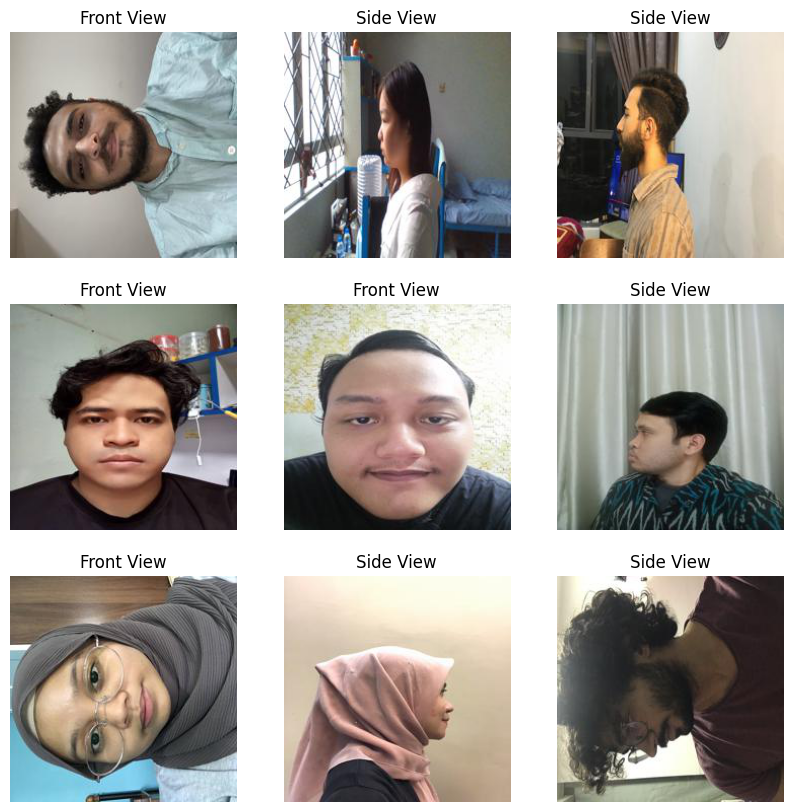

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

Create the base model from the pre-trained VGG16

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

553467096/553467096 [==============================] - 17s 0us/step
****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                

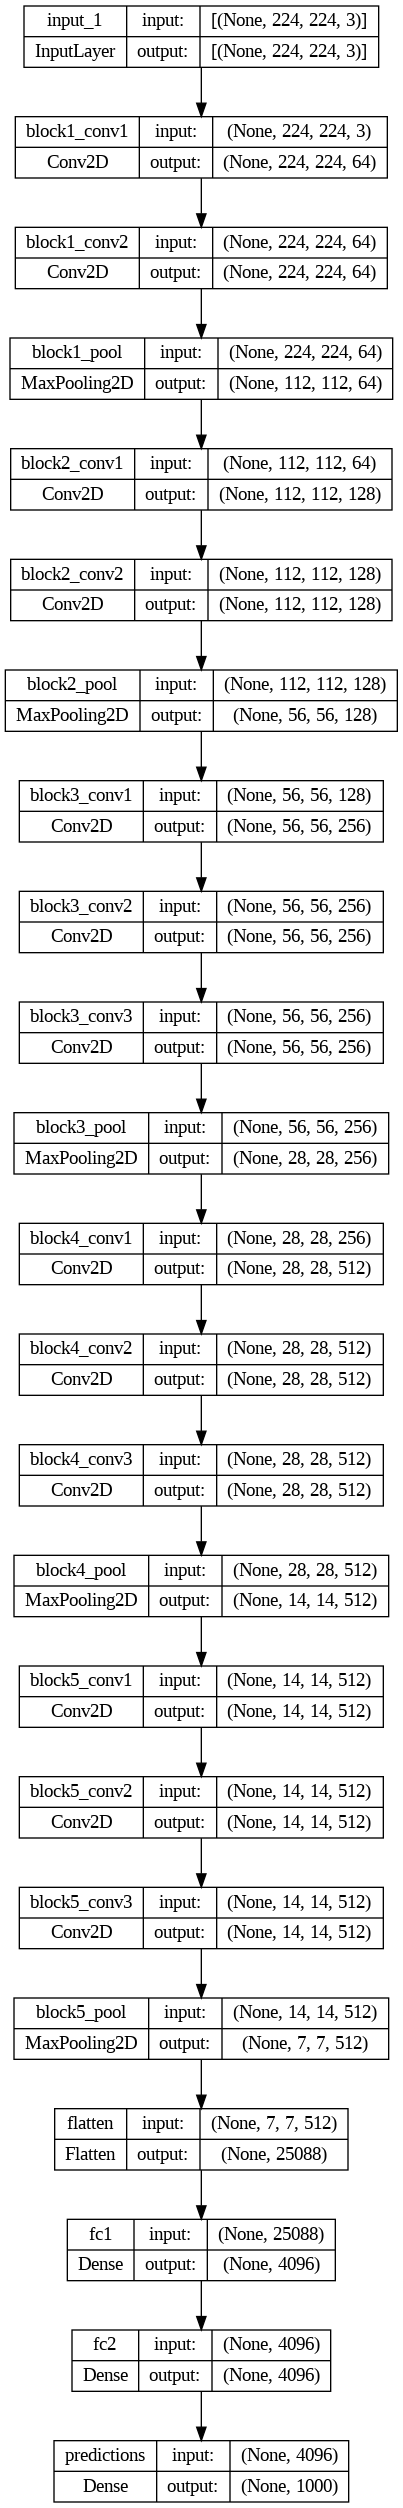

In [ ]:
tf.keras.utils.plot_model(base_model, to_file = 'VGG16_basemodel.png', show_shapes = True)

Without Data Argumentation

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

print("****model after removing copy all VGG16 layers and remove the last layer****")
model.summary()


****model after removing copy all VGG16 layers and remove the last layer****
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                           

Add the last layer with new dense layer with 2 outputs replacing the dense layer with 1000 outputs

In [ ]:
#Freezing the existing weights
#for layer in model.layers:
#    layer.trainable = False
#print(model.summary())

#Freeze parameters of all layers except the last layer
#for layer in model.layers[:-1]:
 #  layer.trainable = False

# Freeze parameters of all layers except the last and second layers
#for layer in model.layers[:-2]:
 #   layer.trainable = False

# Freeze parameters of all layers except the last, second, and third layers
for layer in model.layers[:-3]:
    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                        

Compile Model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
30/30 [==============================] - 1334s 45s/step - loss: 1.0312 - accuracy: 0.8829 - val_loss: 0.1148 - val_accuracy: 0.9776
Epoch 2/5
30/30 [==============================] - 1331s 45s/step - loss: 0.0629 - accuracy: 0.9801 - val_loss: 0.1371 - val_accuracy: 0.9728
Epoch 3/5
30/30 [==============================] - 1317s 44s/step - loss: 0.0868 - accuracy: 0.9760 - val_loss: 0.1003 - val_accuracy: 0.9680
Epoch 4/5
30/30 [==============================] - 1302s 44s/step - loss: 0.1182 - accuracy: 0.9719 - val_loss: 0.3577 - val_accuracy: 0.9520
Epoch 5/5
30/30 [==============================] - 1280s 43s/step - loss: 0.1680 - accuracy: 0.9671 - val_loss: 0.1011 - val_accuracy: 0.9728


Plot the learning curves

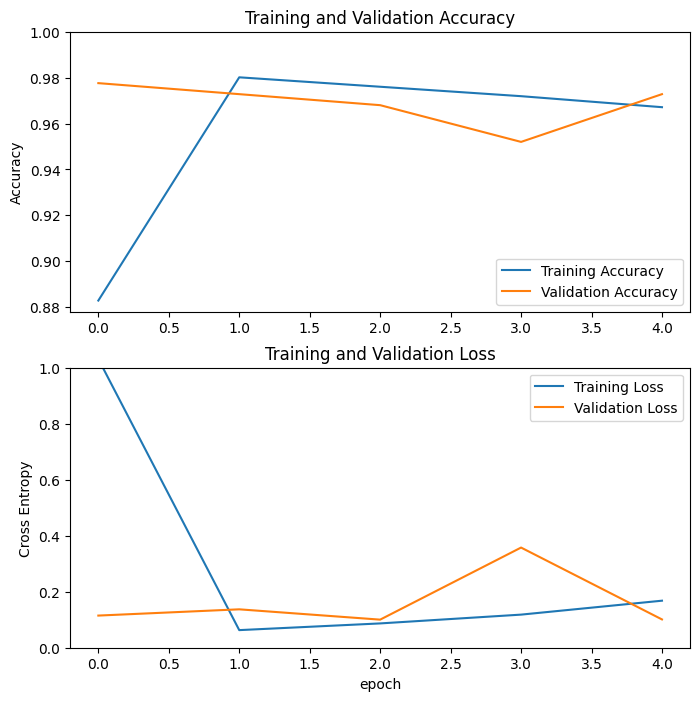

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Test the model

18/18 [==============================] - 540s 30s/step - loss: 0.0311 - accuracy: 0.9911
Test accuracy: 0.991051435470581


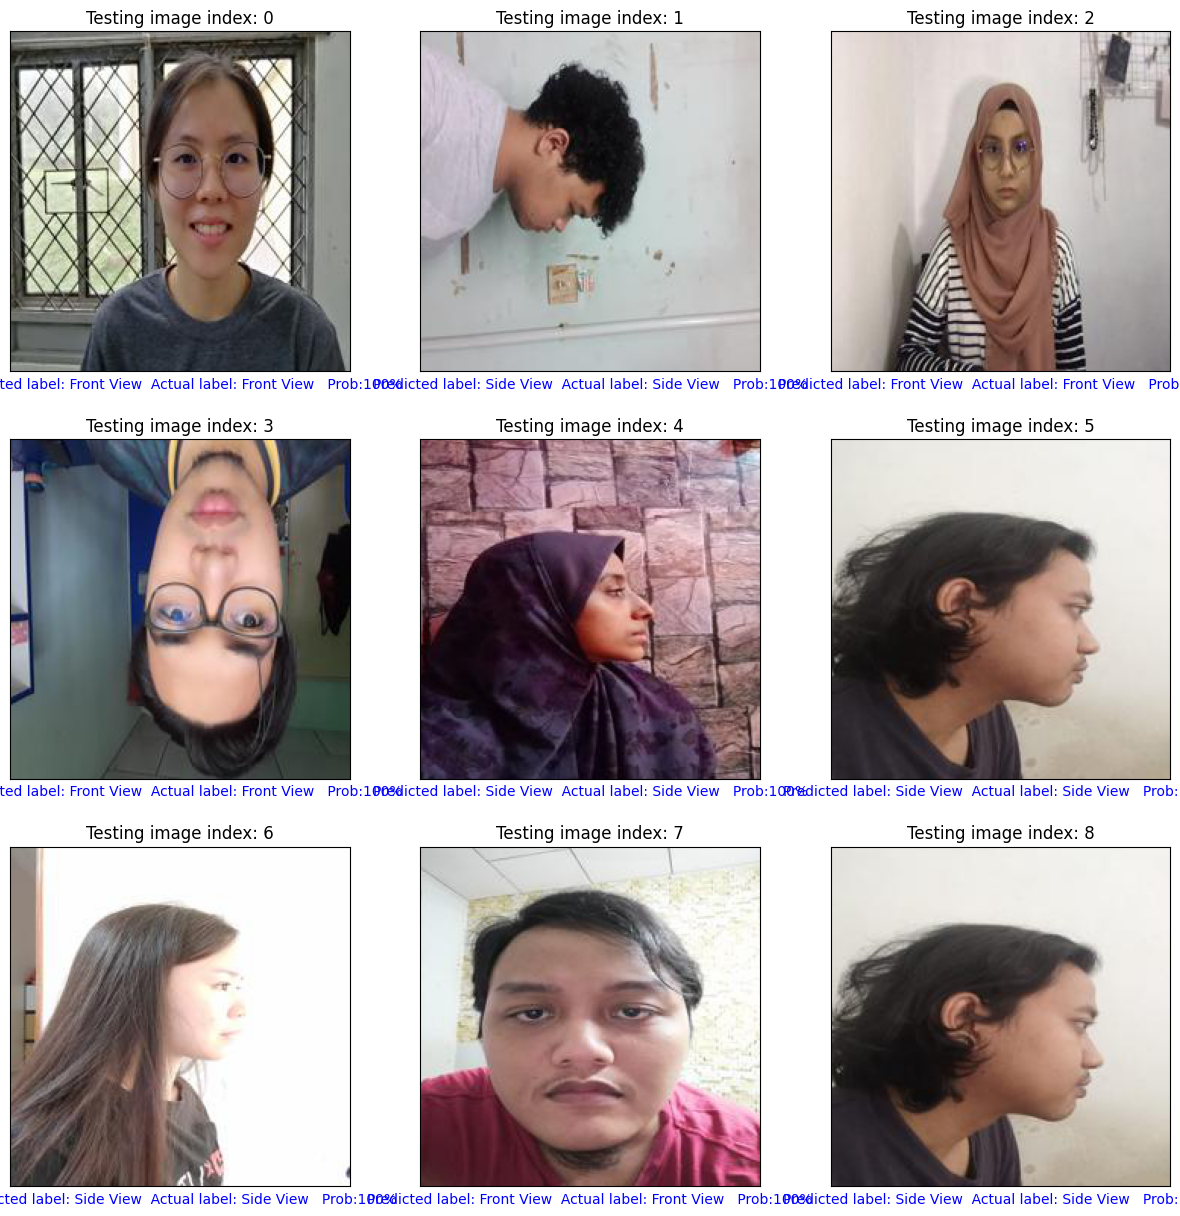

In [ ]:
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)


# test model in test image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

With Data Augmentation

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation options for training and validation
train_data_generator = ImageDataGenerator( validation_split=0.3,
                                          rotation_range = 30,
                                          width_shift_range=0.3,
                                          height_shift_range=0.3,
                                          )

# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1460 images belonging to 2 classes.


In [ ]:
# import matplotlib.pyplot as plt

# single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
# batch_images = single_train_image_batch[0]
# batch_labels = single_train_image_batch[1]
# print(batch_images.shape)
# print(batch_labels.shape)

# plt.figure(figsize=(10, 10))
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(batch_images[i].astype("uint8"))
#   plt.title(names[batch_labels[i].astype("int")])
#   plt.axis("off")

Recreate the model form VGG16

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

Freezen some layers and add last laser with dense layer (2 outputs)

In [ ]:
#Freezing the existing weights
#for layer in model.layers:
#    layer.trainable = False
#print(model.summary())

#Freeze parameters of all layers except the last layer
#for layer in model.layers[:-1]:
#   layer.trainable = False

# Freeze parameters of all layers except the last and second layers
#for layer in model.layers[:-2]:
 #   layer.trainable = False

# Freeze parameters of all layers except the last, second, and third layers
for layer in model.layers[:-3]:
    layer.trainable = False

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()

****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                          

Compile the model

In [ ]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)


Epoch 1/5
30/30 [==============================] - 1349s 45s/step - loss: 11.2889 - accuracy: 0.6973 - val_loss: 0.1117 - val_accuracy: 0.9536
Epoch 2/5
30/30 [==============================] - 1339s 45s/step - loss: 0.1512 - accuracy: 0.9466 - val_loss: 0.1163 - val_accuracy: 0.9616
Epoch 3/5
30/30 [==============================] - 1333s 45s/step - loss: 0.1024 - accuracy: 0.9685 - val_loss: 0.3542 - val_accuracy: 0.9120
Epoch 4/5
30/30 [==============================] - 1330s 45s/step - loss: 0.1393 - accuracy: 0.9575 - val_loss: 0.1163 - val_accuracy: 0.9632
Epoch 5/5
30/30 [==============================] - 1330s 45s/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 0.2524 - val_accuracy: 0.9520


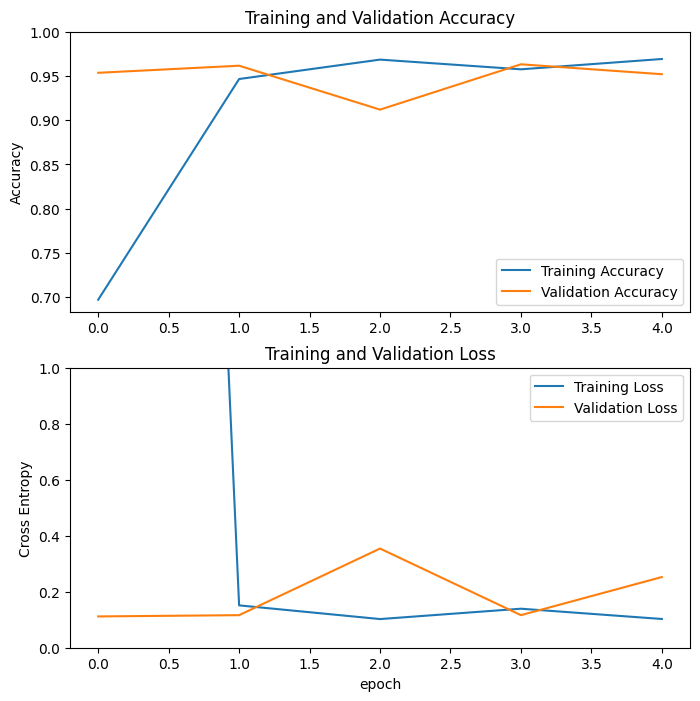

In [ ]:
## Plotting the learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
## Testing the model
# print(test_batches.shape)
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

18/18 [==============================] - 543s 30s/step - loss: 0.0805 - accuracy: 0.9843
Test accuracy: 0.9843400716781616


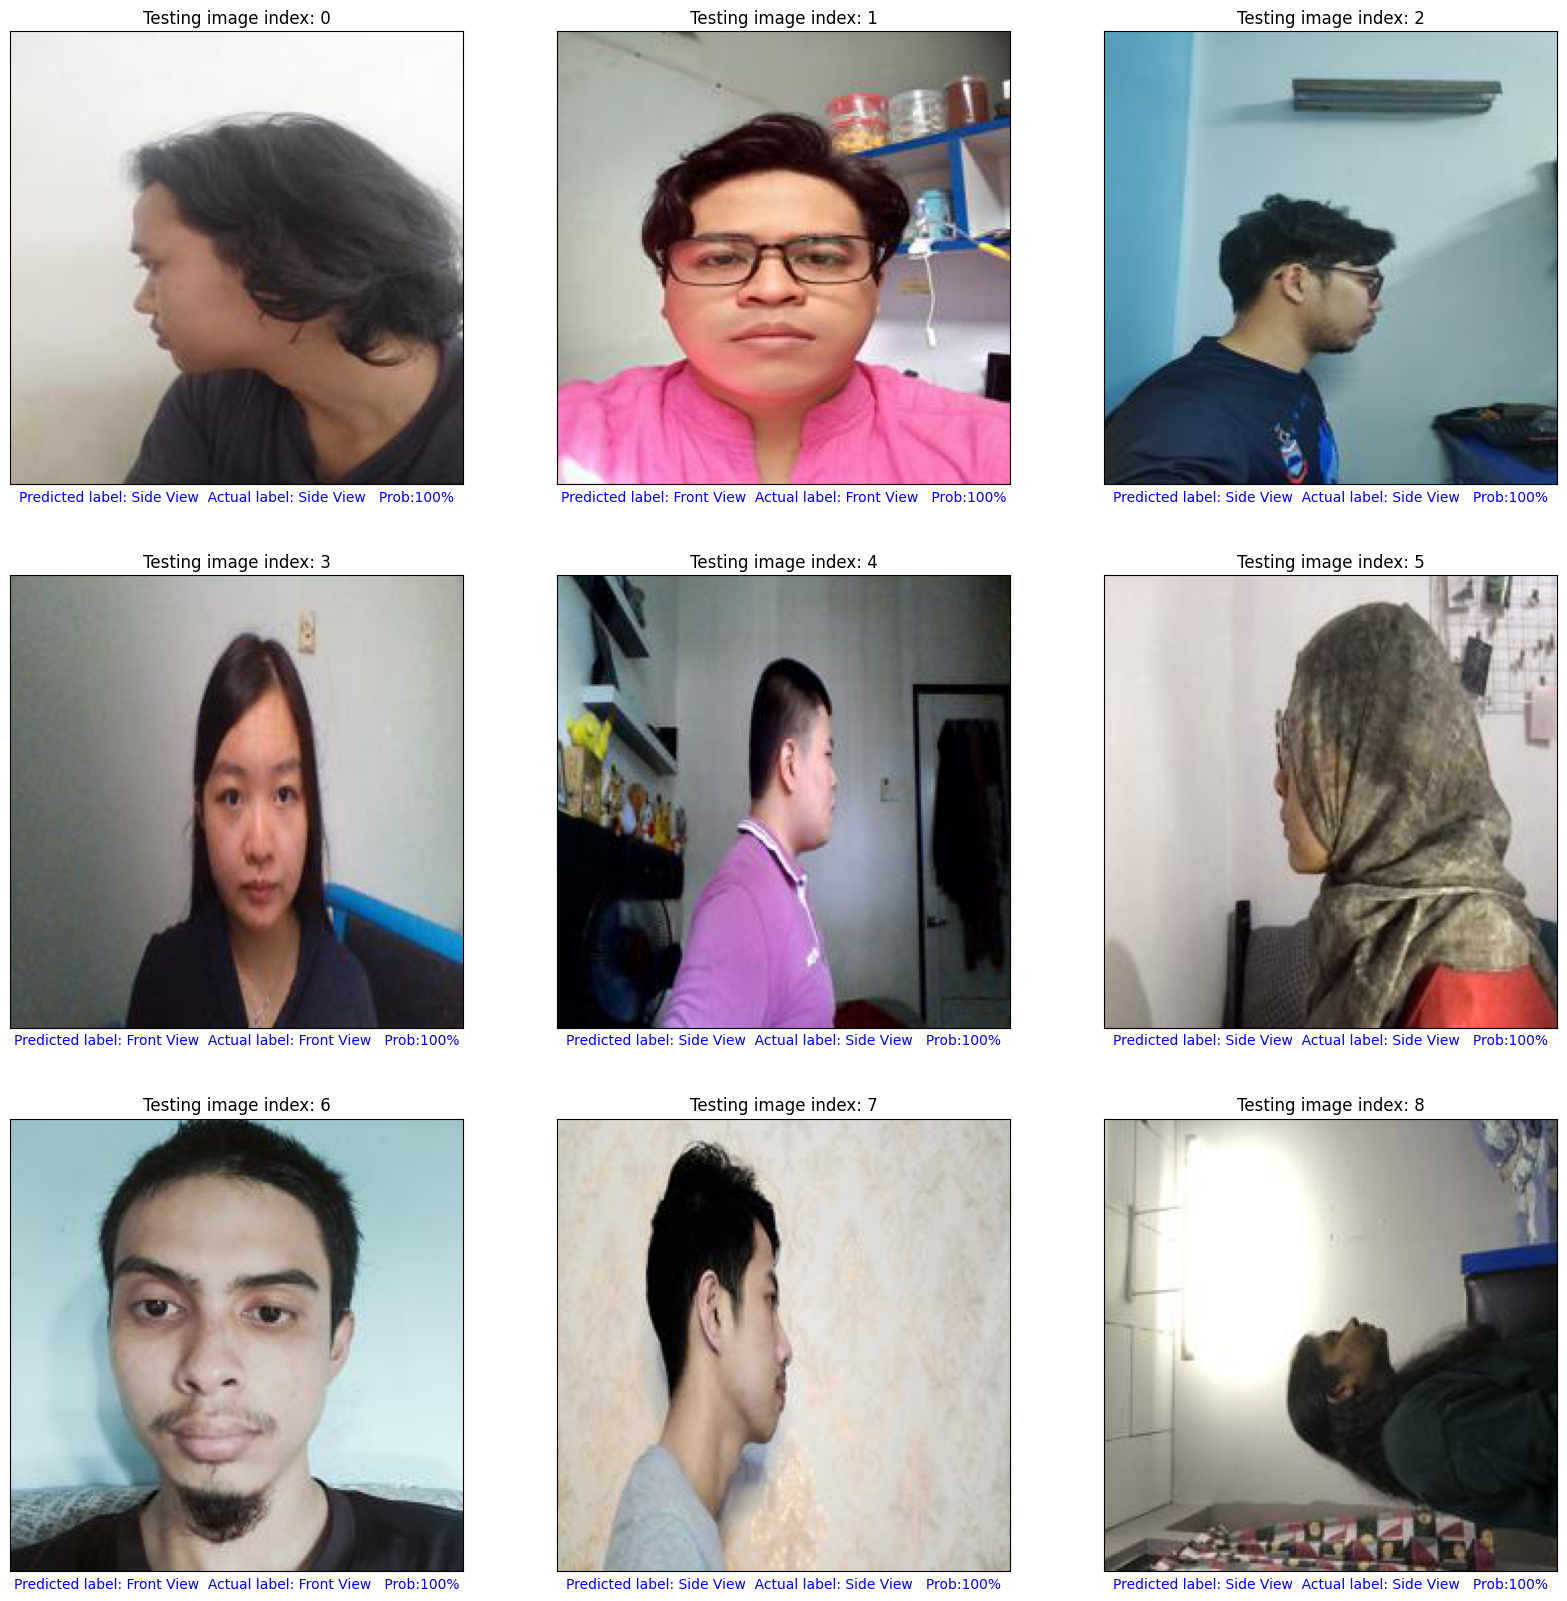

In [ ]:
## Data visualization
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                color=color)


single_test_image_batch = test_batches.next()
predicted_label_prob = model(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(20, 20))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))